In [1]:
#imports
import pandas
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import numpy 
from scipy.cluster.hierarchy import fcluster

In [2]:
#read in mash file removing genomes compared to themselves
distances = [x.split()[0:3] for x in open("mash_pairwise_distances.txt","r")]

In [3]:
dfLabels = ['genome1','genome2','distance']
df = pandas.DataFrame.from_records(distances,columns=dfLabels)
df['distance'] = df['distance'].astype(float) 

In [4]:
df.head()


,genome1,genome2,distance
0,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229...,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229...,0.0
1,ncbi-genomes-2018-09-19/GCA_002291495.1_ASM229...,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229...,1.0
2,ncbi-genomes-2018-09-19/GCA_002291505.1_ASM229...,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229...,1.0
3,ncbi-genomes-2018-09-19/GCA_002291515.1_ASM229...,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229...,1.0
4,ncbi-genomes-2018-09-19/GCA_002291565.1_ASM229...,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229...,1.0


In [5]:
#long to wide pivot(row-names, col-names, value)
df = df.pivot('genome1', 'genome2', 'distance')
df


genome2,ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229148v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291495.1_ASM229149v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291505.1_ASM229150v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291515.1_ASM229151v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291565.1_ASM229156v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291575.1_ASM229157v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291585.1_ASM229158v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291595.1_ASM229159v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291645.1_ASM229164v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002291655.1_ASM229165v1_genomic.fna,...,ncbi-genomes-2018-09-19/GCA_002509565.1_ASM250956v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509575.1_ASM250957v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509605.1_ASM250960v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509625.1_ASM250962v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509645.1_ASM250964v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509655.1_ASM250965v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509665.1_ASM250966v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509705.1_ASM250970v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509725.1_ASM250972v1_genomic.fna,ncbi-genomes-2018-09-19/GCA_002509745.1_ASM250974v1_genomic.fna
genome1,,,,,,,,,,,,,,,,,,,,,
ncbi-genomes-2018-09-19/GCA_002291485.1_ASM229148v1_genomic.fna,0.000000,1.0,1.0,1.000000,1.000000,1.000000,0.295981,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291495.1_ASM229149v1_genomic.fna,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291505.1_ASM229150v1_genomic.fna,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291515.1_ASM229151v1_genomic.fna,1.000000,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291565.1_ASM229156v1_genomic.fna,1.000000,1.0,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291575.1_ASM229157v1_genomic.fna,1.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291585.1_ASM229158v1_genomic.fna,0.295981,1.0,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291595.1_ASM229159v1_genomic.fna,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ncbi-genomes-2018-09-19/GCA_002291645.1_ASM229164v1_genomic.fna,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [6]:
matrix = df.values
matrix

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [7]:
#clustering
#condense matrix
matCond = squareform(matrix)
#calculate linkage
Z = linkage(matCond,'ward')

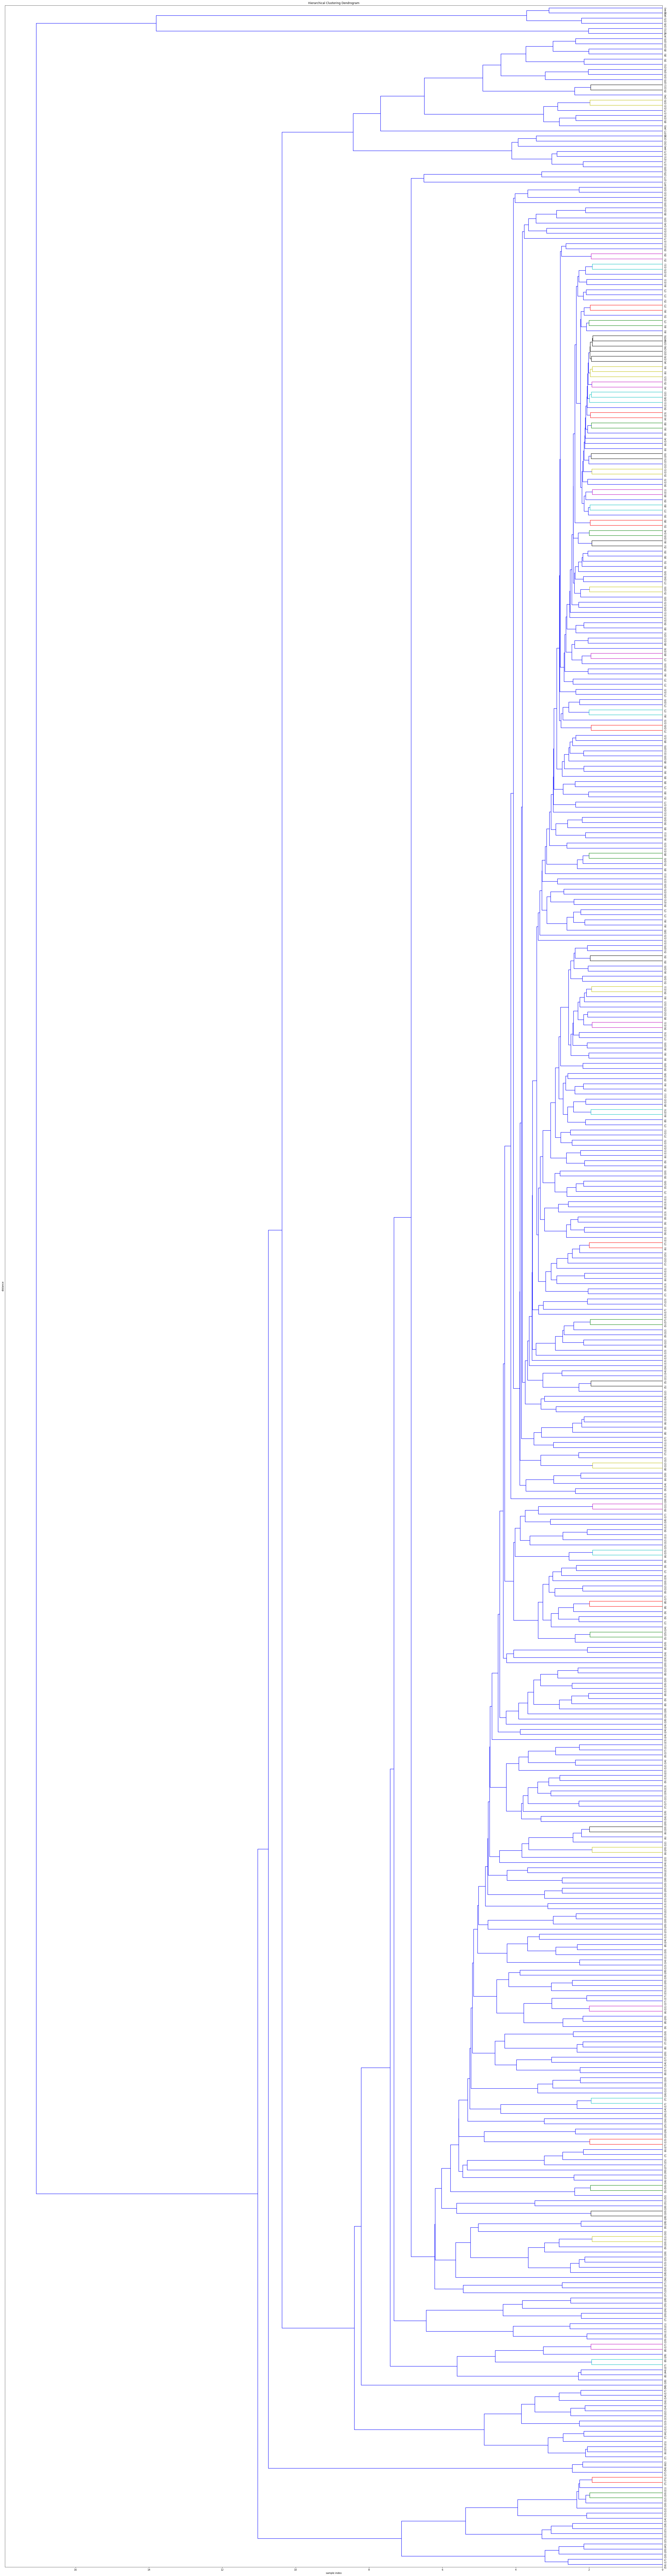

In [8]:
#plot dendogram from mash distance
plt.figure(figsize=(50,200))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=10.,
    color_threshold=2,
    truncate_mode='lastp',
    p=500,
    orientation='left'
)
plt.show()

In [9]:
#select clusters 
clusters=fcluster(Z,2,'distance')
clusterDF=pandas.DataFrame({'genome':df.columns.tolist() , 'cluster':clusters})
clusterDF.head()
clusterDF.to_csv('clusterAssignment.tsv',sep="\t")